In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM

#import

In [3]:
feanum=7
window=5
df1=pd.read_csv('new_^IXIC.csv') 
df1 = df1.drop(columns=['Date'])
df1.tail()

,Open,High,Low,Close,Adj Close,Volume,truth
1085,14149.919922,14274.410156,14138.009766,14244.950195,14244.950195,4.593160e+09,1
1086,14212.250000,14396.690430,14176.110352,14353.639648,14353.639648,4.824070e+09,1
1087,14398.530273,14446.549805,14317.089844,14358.019531,14358.019531,5.112420e+09,1
1088,14273.290039,14309.919922,14030.620117,14063.309570,14063.309570,5.128020e+09,1
1089,14148.179688,14179.009766,14020.450195,14032.809570,14032.809570,5.254180e+09,1


In [4]:
# normalization operation
from sklearn import preprocessing
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])
min_max_scaler = preprocessing.MinMaxScaler()
df0 = min_max_scaler.fit_transform(numeric_columns)
df = pd.DataFrame(df0, columns=numeric_columns.columns)
df = pd.concat([df1.drop(columns=numeric_columns.columns), df], axis=1)

df.tail()

,Open,High,Low,Close,Adj Close,Volume,truth
1085,0.670902,0.666985,0.683014,0.689862,0.689862,0.255277,1.0
1086,0.681309,0.687999,0.689441,0.708460,0.708460,0.279746,1.0
1087,0.712413,0.696567,0.713221,0.709210,0.709210,0.310301,1.0
1088,0.691501,0.673087,0.664899,0.658782,0.658782,0.311954,1.0
1089,0.670612,0.650590,0.663184,0.653563,0.653563,0.325322,1.0


In [5]:
# Re-sort the columns
order = ['Open', 'High', 'Low', 'Adj Close','Volume', 'truth', 'Close']
df = df[order]
df.tail()

,Open,High,Low,Adj Close,Volume,truth,Close
1085,0.670902,0.666985,0.683014,0.689862,0.255277,1.0,0.689862
1086,0.681309,0.687999,0.689441,0.708460,0.279746,1.0,0.708460
1087,0.712413,0.696567,0.713221,0.709210,0.310301,1.0,0.709210
1088,0.691501,0.673087,0.664899,0.658782,0.311954,1.0,0.658782
1089,0.670612,0.650590,0.663184,0.653563,0.325322,1.0,0.653563


In [6]:
# This part is about processing data to transform the raw data into LSTM network's input
stock = df
seq_len = window
amount_of_features = len(stock.columns)  # Number of columns
data = stock.values  # Convert DataFrame to NumPy array using 'values' attribute
sequence_length = seq_len + 1  # Sequence length + 1
result = []

# Loop to create sequences for training
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])

result = np.array(result)  # Obtaining samples, each sample has a shape of window*feanum
cut = 200  # Split between training and testing sets, last 'cut' samples for testing
train = result[:-cut, :]
x_train = train[:, :-1]
y_train = train[:, -1][:, -1]
x_test = result[-cut:, :-1]
y_test = result[-cut:, -1][:, -1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features)) 

In [7]:
#Show the shape of the training set and test set to see if there are any problems
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (884, 5, 7)
y_train (884,)
X_test (200, 5, 7)
y_test (200,)


In [8]:
d = 0.0001
model = Sequential()  # Build a sequential model
model.add(LSTM(64, input_shape=(window, feanum), return_sequences=True))  # Add LSTM layer
model.add(Dropout(d))  # Add dropout layer
model.add(LSTM(16, return_sequences=False))  # Add LSTM layer
model.add(Dropout(d))  # Add dropout layer
model.add(Dense(4, kernel_initializer='uniform', activation='relu'))  # Add fully connected layer
model.add(Dense(1, kernel_initializer='uniform', activation='relu'))  # Add fully connected layer
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32)  # Train the model for 100 epochs


Epoch 1/100
28/28 [==============================] - 2s 3ms/step - loss: 0.2840 - accuracy: 0.0011
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.0011
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.1208 - accuracy: 0.0011
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 0.0011
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.0011
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.0045
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.0045
Epoch 8/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.0045
Epoch 9/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.0045
Epoch 10/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.0045
Epoch 11/

In [9]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             18432     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                5184      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 4)                 68        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 23689 (92.54 KB)
Trainable params: 23689 (

In [10]:
y_train_predict=model.predict(X_train)[:,0]
y_train=y_train

28/28 [==============================] - 1s 1ms/step


28/28 [==============================] - 0s 1ms/step


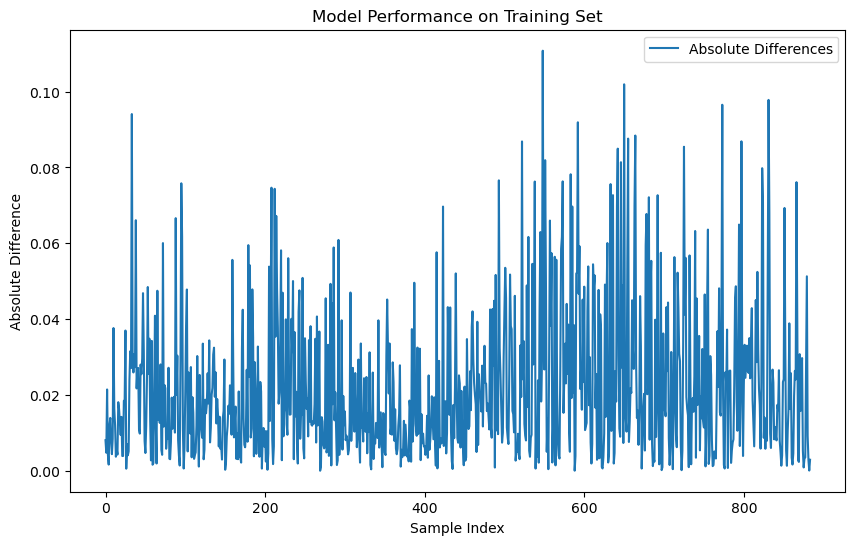

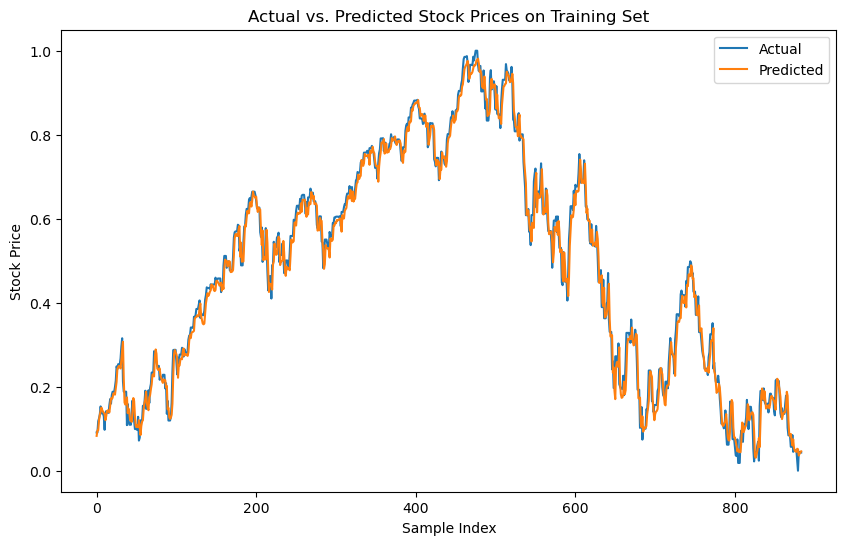

In [11]:
# Get model predictions on the training set
y_train_predict = model.predict(X_train)[:, 0]

# Calculate the absolute differences between predictions and actual values for training set
abs_diff_train = abs(y_train_predict - y_train)

# Plot the absolute differences for the training set
plt.figure(figsize=(10, 6))
plt.plot(abs_diff_train, label='Absolute Differences')
plt.xlabel('Sample Index')
plt.ylabel('Absolute Difference')
plt.title('Model Performance on Training Set')
plt.legend()
plt.show()

# Plot actual vs. predicted values for the training set
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual')
plt.plot(y_train_predict, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices on Training Set')
plt.legend()
plt.show()

In [12]:
#Prediction on test set
y_test_predict=model.predict(X_test)[:,0]
y_test=y_test

7/7 [==============================] - 0s 1ms/step


7/7 [==============================] - 0s 1ms/step


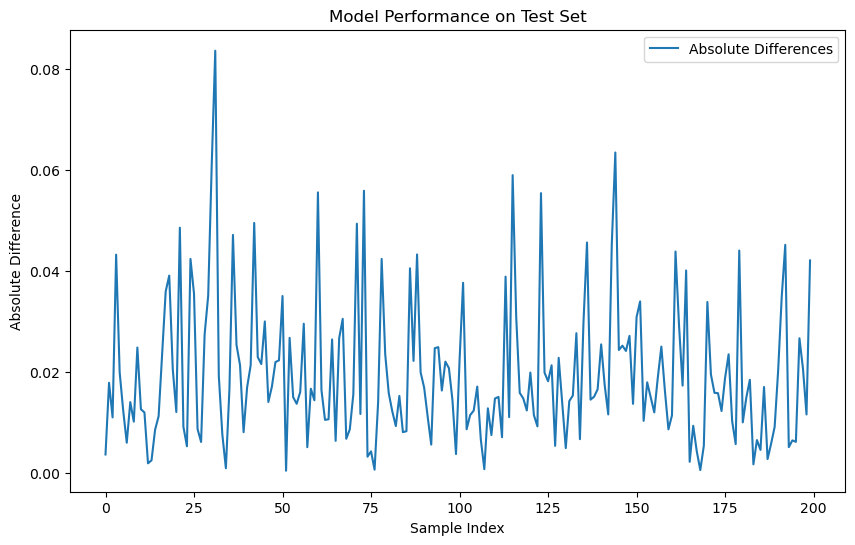

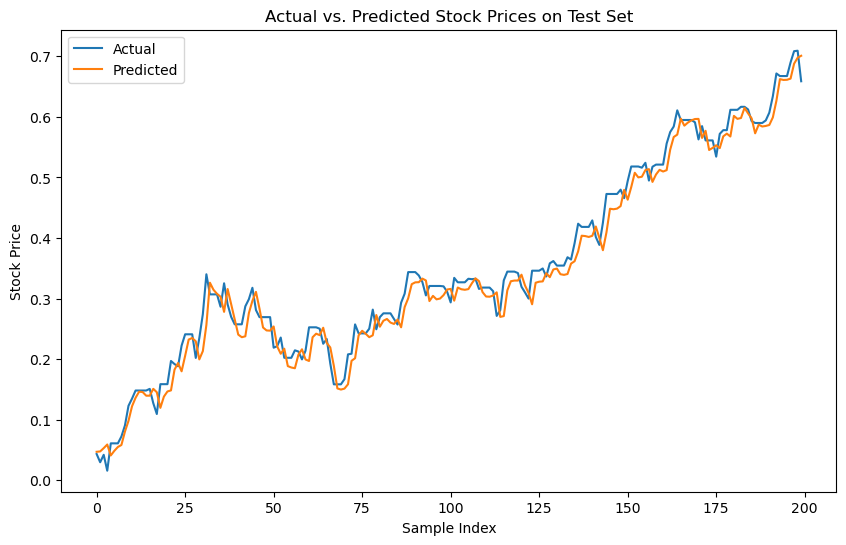

In [13]:
# Get model predictions on the test set
y_test_predict = model.predict(X_test)[:, 0]

# Calculate the absolute differences between predictions and actual values for test set
abs_diff_test = abs(y_test_predict - y_test)

# Plot the absolute differences for the test set
plt.figure(figsize=(10, 6))
plt.plot(abs_diff_test, label='Absolute Differences')
plt.xlabel('Sample Index')
plt.ylabel('Absolute Difference')
plt.title('Model Performance on Test Set')
plt.legend()
plt.show()

# Plot actual vs. predicted values for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_predict, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices on Test Set')
plt.legend()
plt.show()

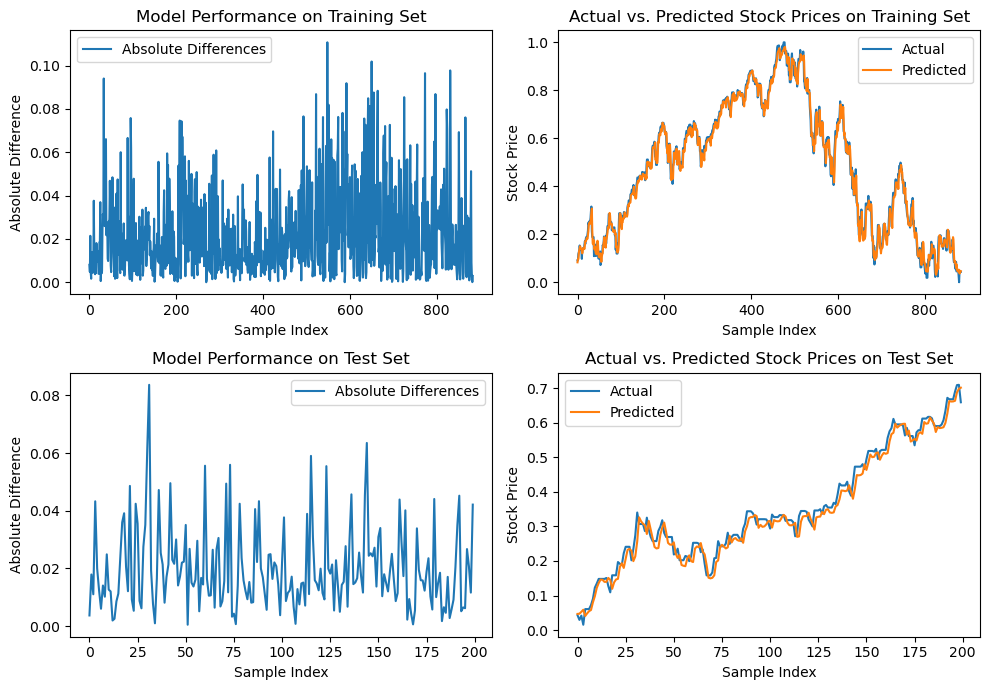

In [17]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(10, 7))  # Adjust the figsize to change the height

gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

# Plot absolute differences for training set
ax1 = plt.subplot(gs[0, 0])
ax1.plot(abs_diff_train, label='Absolute Differences')
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('Absolute Difference')
ax1.set_title('Model Performance on Training Set')
ax1.legend()

# Plot actual vs. predicted values for training set
ax2 = plt.subplot(gs[0, 1])
ax2.plot(y_train, label='Actual')
ax2.plot(y_train_predict, label='Predicted')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Stock Price')
ax2.set_title('Actual vs. Predicted Stock Prices on Training Set')
ax2.legend()

# Plot absolute differences for test set
ax3 = plt.subplot(gs[1, 0])
ax3.plot(abs_diff_test, label='Absolute Differences')
ax3.set_xlabel('Sample Index')
ax3.set_ylabel('Absolute Difference')
ax3.set_title('Model Performance on Test Set')
ax3.legend()

# Plot actual vs. predicted values for test set
ax4 = plt.subplot(gs[1, 1])
ax4.plot(y_test, label='Actual')
ax4.plot(y_test_predict, label='Predicted')
ax4.set_xlabel('Sample Index')
ax4.set_ylabel('Stock Price')
ax4.set_title('Actual vs. Predicted Stock Prices on Test Set')
ax4.legend()

plt.tight_layout()
plt.show()


In [20]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.02185522889534957
0.0008601254237707855
8.116512735733883
测试集上的MAE/MSE/MAPE
0.019625992884072012
0.0005857834761085517
8.010790976361916
预测涨跌正确: 0.34673366834170855


MAE for 7 samples: 0.01630117867057614
MSE for 7 samples: 0.0004160276489075979
RMSE for 7 samples: 0.020396755842721603


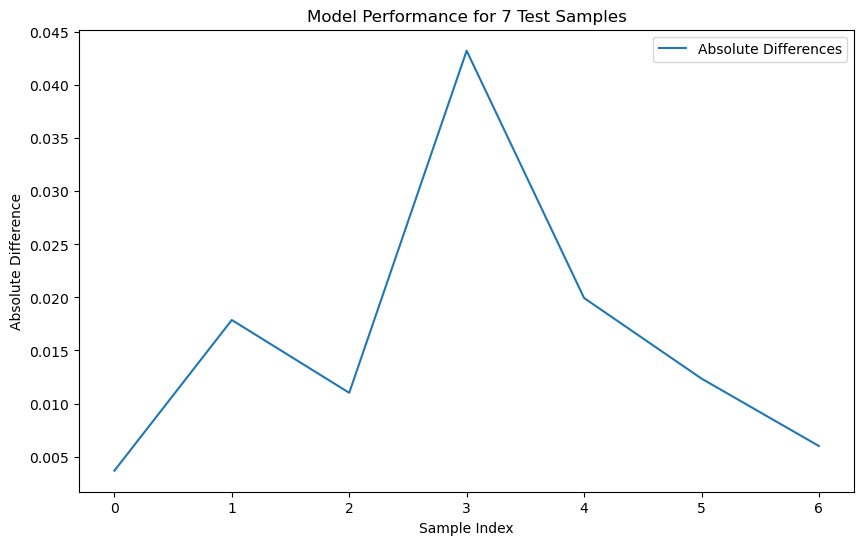

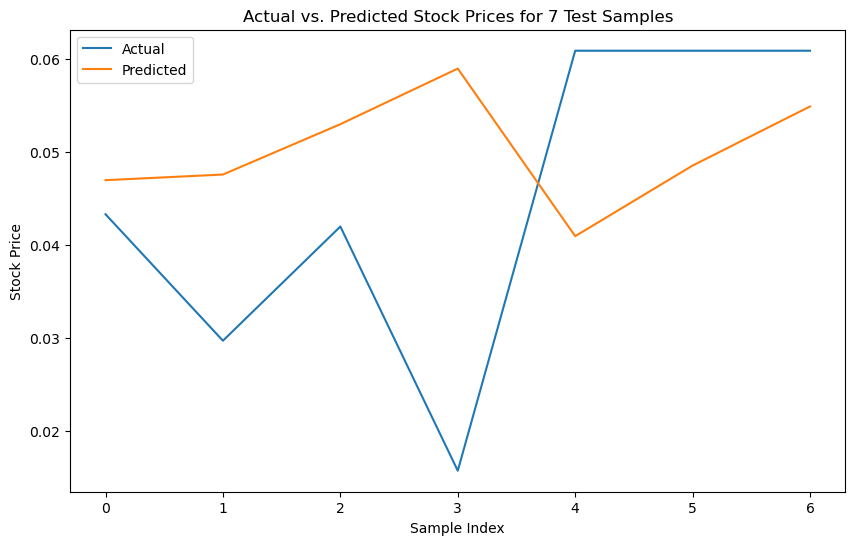

In [21]:
samples_to_plot = 7
y_test_7 = y_test[:samples_to_plot]
y_test_predict_7 = y_test_predict[:samples_to_plot]
mae_7 = mean_absolute_error(y_test_7, y_test_predict_7)
mse_7 = mean_squared_error(y_test_7, y_test_predict_7)
rmse_7 = sqrt(mse_7)

print(f"MAE for 7 samples: {mae_7}")
print(f"MSE for 7 samples: {mse_7}")
print(f"RMSE for 7 samples: {rmse_7}")
# Absolute differences plot
plt.figure(figsize=(10, 6))
plt.plot(abs(y_test_predict_7 - y_test_7), label='Absolute Differences')
plt.xlabel('Sample Index')
plt.ylabel('Absolute Difference')
plt.title('Model Performance for 7 Test Samples')
plt.legend()
plt.show()

# Actual vs. predicted plot
plt.figure(figsize=(10, 6))
plt.plot(y_test_7, label='Actual')
plt.plot(y_test_predict_7, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices for 7 Test Samples')
plt.legend()
plt.show()


MAE for 30 samples: 0.01872964949564664
MSE for 30 samples: 0.0005311356823369707
RMSE for 30 samples: 0.023046381111510125


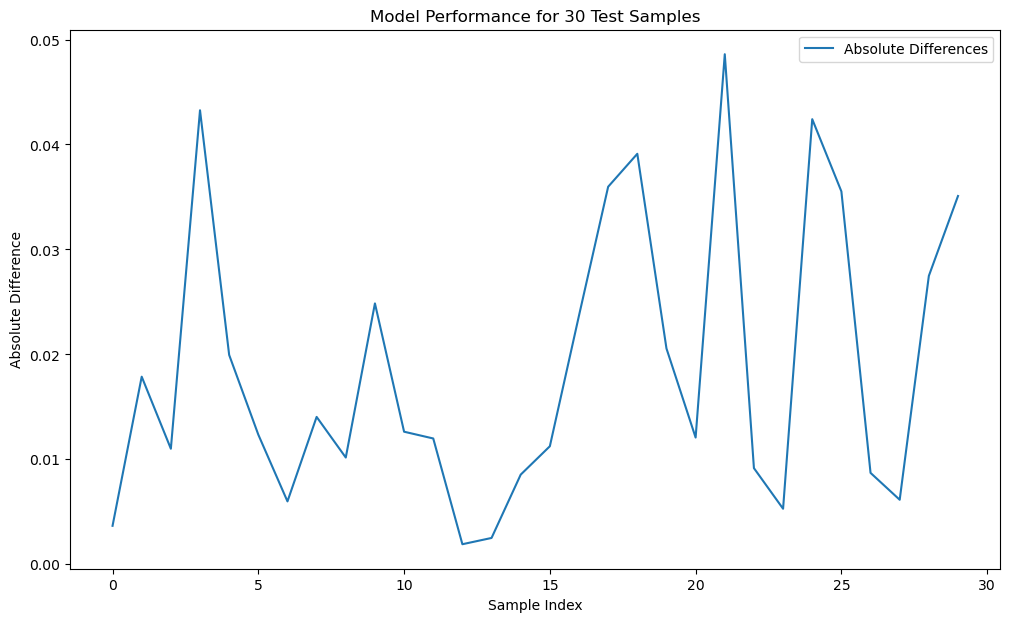

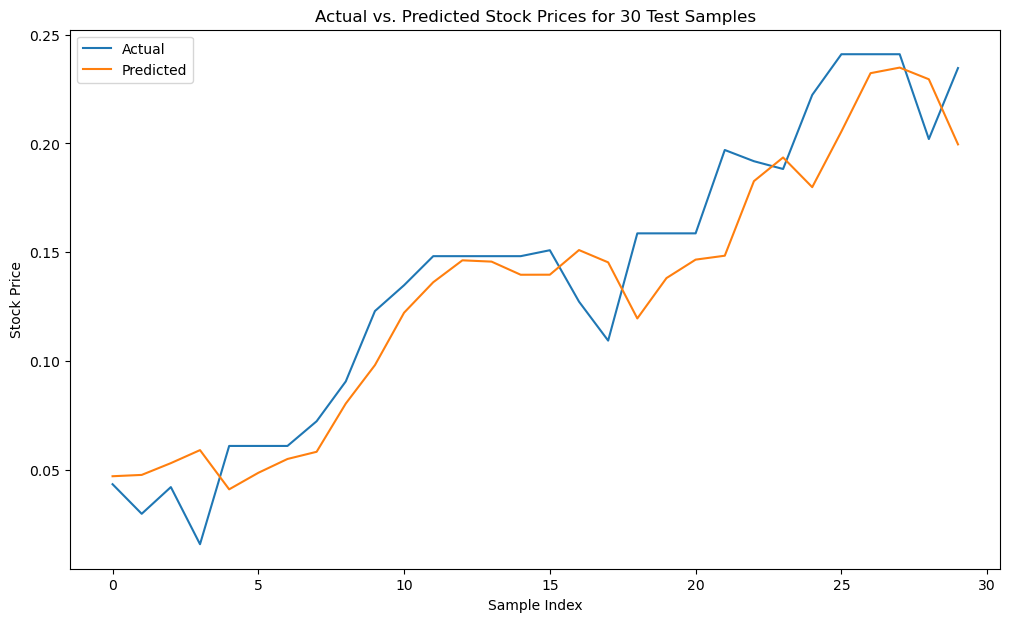

In [22]:
samples_to_plot = 30
y_test_30 = y_test[:samples_to_plot]
y_test_predict_30 = y_test_predict[:samples_to_plot]
mae_30 = mean_absolute_error(y_test_30, y_test_predict_30)
mse_30 = mean_squared_error(y_test_30, y_test_predict_30)
rmse_30 = sqrt(mse_30)

print(f"MAE for 30 samples: {mae_30}")
print(f"MSE for 30 samples: {mse_30}")
print(f"RMSE for 30 samples: {rmse_30}")
# Absolute differences plot
plt.figure(figsize=(12, 7))
plt.plot(abs(y_test_predict_30 - y_test_30), label='Absolute Differences')
plt.xlabel('Sample Index')
plt.ylabel('Absolute Difference')
plt.title('Model Performance for 30 Test Samples')
plt.legend()
plt.show()

# Actual vs. predicted plot
plt.figure(figsize=(12, 7))
plt.plot(y_test_30, label='Actual')
plt.plot(y_test_predict_30, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices for 30 Test Samples')
plt.legend()
plt.show()
